In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/SVB Balance sheet.csv",index_col=False)
df.head()

,Date,12/30/2022,12/30/2021,12/30/2020,12/30/2019,Unnamed: 5
0,Total Assets,211793000.0,211478000.0,115511007.0,71004903.0,NaN
1,CashCash Equivalents & Federal Funds Sold,13803000.0,14619000.0,17674763.0,6781783.0,NaN
2,Cash And Cash Equivalents,13081000.0,14012000.0,17447916.0,6492443.0,NaN
3,Cash,1293000.0,2201000.0,17447916.0,6492443.0,NaN
4,\n,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.drop(columns = ["Unnamed: 5"],inplace = True)

In [ ]:
df.shape

(136, 5)

In [ ]:
df_transpose = df.transpose()
df_transpose.head()

,0,1,2,3,4,5,6,7,8,9,...,126,127,128,129,130,131,132,133,134,135
Date,Total Assets,CashCash Equivalents & Federal Funds Sold,Cash And Cash Equivalents,Cash,\n,Cash Equivalents,\n,Cash And Due from Banks,\n,Money Market Investments,...,\n,Net Debt,\n,Share Issued,\n,Ordiry Shares Number,\n,Preferred Shares Number,EBIT,Net Income
12/30/2022,211793000.0,13803000.0,13081000.0,1293000.0,NaN,0.0,NaN,11788000.0,NaN,722000.0,...,NaN,5329000.0,NaN,59172.0,NaN,59172.0,NaN,383.5,2172000.0,1672000.0
12/30/2021,211478000.0,14619000.0,14012000.0,2201000.0,NaN,352000.0,NaN,11459000.0,NaN,607000.0,...,NaN,NaN,NaN,58748.0,NaN,58748.0,NaN,383.5,2172000.0,1672000.0
12/30/2020,115511007.0,17674763.0,17447916.0,17447916.0,NaN,NaN,NaN,17674763.0,NaN,226847.0,...,NaN,NaN,NaN,51888.0,NaN,51888.0,NaN,350.0,2724000.0,1833000.0
12/30/2019,71004903.0,6781783.0,6492443.0,6492443.0,NaN,0.0,NaN,6781783.0,NaN,289340.0,...,NaN,NaN,NaN,51656.0,NaN,51656.0,NaN,350.0,1741881.0,1208368.0


In [ ]:
df_transpose.isna().sum()

0      0
1      0
2      0
3      0
4      4
      ..
131    0
132    4
133    0
134    0
135    0
Length: 136, dtype: int64

In [ ]:
for i in range (135):
  if df_transpose[i].isna().sum() == 4:
    df_transpose.drop(columns = [i],inplace = True)

In [ ]:
df_transpose = df_transpose.transpose().reset_index(drop = True)
df_transpose

,Date,12/30/2022,12/30/2021,12/30/2020,12/30/2019
0,Total Assets,211793000.0,211478000.0,115511007.0,71004903.0
1,CashCash Equivalents & Federal Funds Sold,13803000.0,14619000.0,17674763.0,6781783.0
2,Cash And Cash Equivalents,13081000.0,14012000.0,17447916.0,6492443.0
3,Cash,1293000.0,2201000.0,17447916.0,6492443.0
4,Cash Equivalents,0.0,352000.0,NaN,0.0
...,...,...,...,...,...
77,Share Issued,59172.0,58748.0,51888.0,51656.0
78,Ordiry Shares Number,59172.0,58748.0,51888.0,51656.0
79,Preferred Shares Number,383.5,383.5,350.0,350.0
80,EBIT,2172000.0,2172000.0,2724000.0,1741881.0


In [ ]:
header = df_transpose.transpose().iloc[0]
df_new = df_transpose.iloc[:,1:]
df_new = df_new.transpose()
#df_new.head()
header

0                                  Total Assets
1     CashCash Equivalents & Federal Funds Sold
2                     Cash And Cash Equivalents
3                                          Cash
4                              Cash Equivalents
                        ...                    
77                                 Share Issued
78                         Ordiry Shares Number
79                      Preferred Shares Number
80                                         EBIT
81                                   Net Income
Name: Date , Length: 82, dtype: object

In [ ]:
df_new = df_new.fillna(df_new.mean())

In [ ]:
df_new.head()

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
12/30/2022,211793000.0,13803000.0,13081000.0,1293000.0,0.000000,11788000.0,722000.0,722000.0,722000.0,720000.0,...,15493000.0,30768000.0,11847000.0,18823000.0,5329000.0,59172.0,59172.0,383.5,2172000.0,1672000.0
12/30/2021,211478000.0,14619000.0,14012000.0,2201000.0,352000.000000,11459000.0,607000.0,607000.0,607000.0,107000.0,...,15701000.0,15220000.0,12055000.0,3018000.0,5329000.0,58748.0,58748.0,383.5,2172000.0,1672000.0
12/30/2020,115511007.0,17674763.0,17447916.0,17447916.0,117333.333333,17674763.0,226847.0,226847.0,226847.0,61232.0,...,8015580.0,8743743.0,7675442.0,1123735.0,5329000.0,51888.0,51888.0,350.0,2724000.0,1833000.0
12/30/2019,71004903.0,6781783.0,6492443.0,6492443.0,0.000000,6781783.0,289340.0,289340.0,289340.0,60258.0,...,6283067.0,6495586.0,5942929.0,584264.0,5329000.0,51656.0,51656.0,350.0,1741881.0,1208368.0


In [ ]:
df_new.isna().sum()

0     0
1     0
2     0
3     0
4     0
     ..
77    0
78    0
79    0
80    0
81    0
Length: 82, dtype: int64

In [ ]:
df_new.columns = header

In [ ]:
df_new.head()

Date,Total Assets,CashCash Equivalents & Federal Funds Sold,Cash And Cash Equivalents,Cash,Cash Equivalents,Cash And Due from Banks,Money Market Investments,Federal Funds Sold & Securities Purchased Under Agreements to Resell,Security Agree to be Resold,Federal Home Loan Bank Stock,...,Net Tangible Assets,Invested Capital,Tangible Book Value,Total Debt,Net Debt,Share Issued,Ordiry Shares Number,Preferred Shares Number,EBIT,Net Income
12/30/2022,211793000.0,13803000.0,13081000.0,1293000.0,0.000000,11788000.0,722000.0,722000.0,722000.0,720000.0,...,15493000.0,30768000.0,11847000.0,18823000.0,5329000.0,59172.0,59172.0,383.5,2172000.0,1672000.0
12/30/2021,211478000.0,14619000.0,14012000.0,2201000.0,352000.000000,11459000.0,607000.0,607000.0,607000.0,107000.0,...,15701000.0,15220000.0,12055000.0,3018000.0,5329000.0,58748.0,58748.0,383.5,2172000.0,1672000.0
12/30/2020,115511007.0,17674763.0,17447916.0,17447916.0,117333.333333,17674763.0,226847.0,226847.0,226847.0,61232.0,...,8015580.0,8743743.0,7675442.0,1123735.0,5329000.0,51888.0,51888.0,350.0,2724000.0,1833000.0
12/30/2019,71004903.0,6781783.0,6492443.0,6492443.0,0.000000,6781783.0,289340.0,289340.0,289340.0,60258.0,...,6283067.0,6495586.0,5942929.0,584264.0,5329000.0,51656.0,51656.0,350.0,1741881.0,1208368.0


In [ ]:
df_new = df_new.reset_index()

In [ ]:
df_new.rename(columns = {"index":"Date"},inplace = True)

In [ ]:
df_new.head()

Date,Date,Total Assets,CashCash Equivalents & Federal Funds Sold,Cash And Cash Equivalents,Cash,Cash Equivalents,Cash And Due from Banks,Money Market Investments,Federal Funds Sold & Securities Purchased Under Agreements to Resell,Security Agree to be Resold,...,Net Tangible Assets,Invested Capital,Tangible Book Value,Total Debt,Net Debt,Share Issued,Ordiry Shares Number,Preferred Shares Number,EBIT,Net Income
0,12/30/2022,211793000.0,13803000.0,13081000.0,1293000.0,0.000000,11788000.0,722000.0,722000.0,722000.0,...,15493000.0,30768000.0,11847000.0,18823000.0,5329000.0,59172.0,59172.0,383.5,2172000.0,1672000.0
1,12/30/2021,211478000.0,14619000.0,14012000.0,2201000.0,352000.000000,11459000.0,607000.0,607000.0,607000.0,...,15701000.0,15220000.0,12055000.0,3018000.0,5329000.0,58748.0,58748.0,383.5,2172000.0,1672000.0
2,12/30/2020,115511007.0,17674763.0,17447916.0,17447916.0,117333.333333,17674763.0,226847.0,226847.0,226847.0,...,8015580.0,8743743.0,7675442.0,1123735.0,5329000.0,51888.0,51888.0,350.0,2724000.0,1833000.0
3,12/30/2019,71004903.0,6781783.0,6492443.0,6492443.0,0.000000,6781783.0,289340.0,289340.0,289340.0,...,6283067.0,6495586.0,5942929.0,584264.0,5329000.0,51656.0,51656.0,350.0,1741881.0,1208368.0


In [ ]:
BS_analysis = pd.DataFrame(df_new['Date'])

In [ ]:
working_capital = [26307000,41719000,48566648,20779272]
BS_analysis["Working Capital"] = working_capital

In [ ]:
retained_earnings = df_new["Retained Earnings"]
BS_analysis["Retained Earnings"] = retained_earnings

In [ ]:
total_assets = df_new["Total Assets"]
BS_analysis["Total Assets"] = total_assets

In [ ]:
total_liabilities = df_new["Total Liabilities Net Minority Interest"]
BS_analysis["Total Liabilities"] = total_liabilities

In [ ]:
ebit = df_new["EBIT"]
BS_analysis["EBIT"] = ebit

In [ ]:
book_value_of_equity = df_new["Total Equity Gross Minority Interest"]
BS_analysis["Book Value of Equity"] = book_value_of_equity

In [ ]:
BS_analysis

,Date,Working Capital,Retained Earnings,Total Assets,Total Liabilities,EBIT,Book Value of Equity
0,12/30/2022,26307000,8951000.0,211793000.0,195498000.0,2172000.0,16295000.0
1,12/30/2021,41719000,7442000.0,211478000.0,194869000.0,2172000.0,16609000.0
2,12/30/2020,48566648,5671749.0,115511007.0,107077516.0,2724000.0,8433491.0
3,12/30/2019,20779272,4575601.0,71004903.0,64383823.0,1741881.0,6621080.0


In [ ]:
BS_analysis["A"] = BS_analysis["Working Capital"] / BS_analysis["Total Assets"]

In [ ]:
BS_analysis["B"] = BS_analysis["Retained Earnings"] / BS_analysis["Total Assets"]

In [ ]:
BS_analysis["C"] = BS_analysis["EBIT"] / BS_analysis["Total Assets"]

In [ ]:
BS_analysis["D"] = BS_analysis["Book Value of Equity"] / BS_analysis["Total Liabilities"]

In [ ]:
BS_analysis["Z-score"] = 6.65 * BS_analysis["A"] + 3.26 * BS_analysis["B"] + 6.72 * BS_analysis["C"] + 1.05 * BS_analysis["D"]

In [ ]:
BS_analysis

,Date,Working Capital,Retained Earnings,Total Assets,Total Liabilities,EBIT,Book Value of Equity,A,B,C,D,Z-score
0,12/30/2022,26307000,8951000.0,211793000.0,195498000.0,2172000.0,16295000.0,0.124211,0.042263,0.010255,0.083351,1.120214
1,12/30/2021,41719000,7442000.0,211478000.0,194869000.0,2172000.0,16609000.0,0.197273,0.035190,0.010271,0.085232,1.585101
2,12/30/2020,48566648,5671749.0,115511007.0,107077516.0,2724000.0,8433491.0,0.420450,0.049101,0.023582,0.078761,3.197236
3,12/30/2019,20779272,4575601.0,71004903.0,64383823.0,1741881.0,6621080.0,0.292646,0.064441,0.024532,0.102838,2.429003


In [ ]:
BS_analysis["Net Income"] = df_new["Net Income"]

In [ ]:
BS_analysis

,Date,Working Capital,Retained Earnings,Total Assets,Total Liabilities,EBIT,Book Value of Equity,A,B,C,D,Z-score,Net Income
0,12/30/2022,26307000,8951000.0,211793000.0,195498000.0,2172000.0,16295000.0,0.124211,0.042263,0.010255,0.083351,1.120214,1672000.0
1,12/30/2021,41719000,7442000.0,211478000.0,194869000.0,2172000.0,16609000.0,0.197273,0.035190,0.010271,0.085232,1.585101,1672000.0
2,12/30/2020,48566648,5671749.0,115511007.0,107077516.0,2724000.0,8433491.0,0.420450,0.049101,0.023582,0.078761,3.197236,1833000.0
3,12/30/2019,20779272,4575601.0,71004903.0,64383823.0,1741881.0,6621080.0,0.292646,0.064441,0.024532,0.102838,2.429003,1208368.0


In [ ]:
BS_analysis["Shareholders' Equity"] = df_new["Stockholders' Equity"]

In [ ]:
BS_analysis["ROE"] = BS_analysis["Net Income"] / BS_analysis["Shareholders' Equity"]

In [ ]:
BS_analysis

,Date,Working Capital,Retained Earnings,Total Assets,Total Liabilities,EBIT,Book Value of Equity,A,B,C,D,Z-score,Net Income,Shareholders' Equity,ROE
0,12/30/2022,26307000,8951000.0,211793000.0,195498000.0,2172000.0,16295000.0,0.124211,0.042263,0.010255,0.083351,1.120214,1672000.0,16004000.0,0.104474
1,12/30/2021,41719000,7442000.0,211478000.0,194869000.0,2172000.0,16609000.0,0.197273,0.035190,0.010271,0.085232,1.585101,1672000.0,16236000.0,0.102981
2,12/30/2020,48566648,5671749.0,115511007.0,107077516.0,2724000.0,8433491.0,0.420450,0.049101,0.023582,0.078761,3.197236,1833000.0,8219700.0,0.223001
3,12/30/2019,20779272,4575601.0,71004903.0,64383823.0,1741881.0,6621080.0,0.292646,0.064441,0.024532,0.102838,2.429003,1208368.0,6470307.0,0.186756


In [ ]:
df_etr = pd.read_csv("/content/SVB Earnings and revenue.csv")
df_etr.head()

,Date,Revenue,Net Income*,G+A Expenses,R&D Expenses,Date.1
0,31/12/2022,"5,793","1,509","3,228",-,31/12/2022
1,30/9/2022,"5,828","1,605","3,124",-,30/9/2022
2,30/6/2022,"5,846","1,541","3,064",-,30/6/2022
3,31/3/2022,"5,967","1,710","2,896",-,31/3/2022
4,31/12/2021,"5,794","1,770","2,692",-,31/12/2021


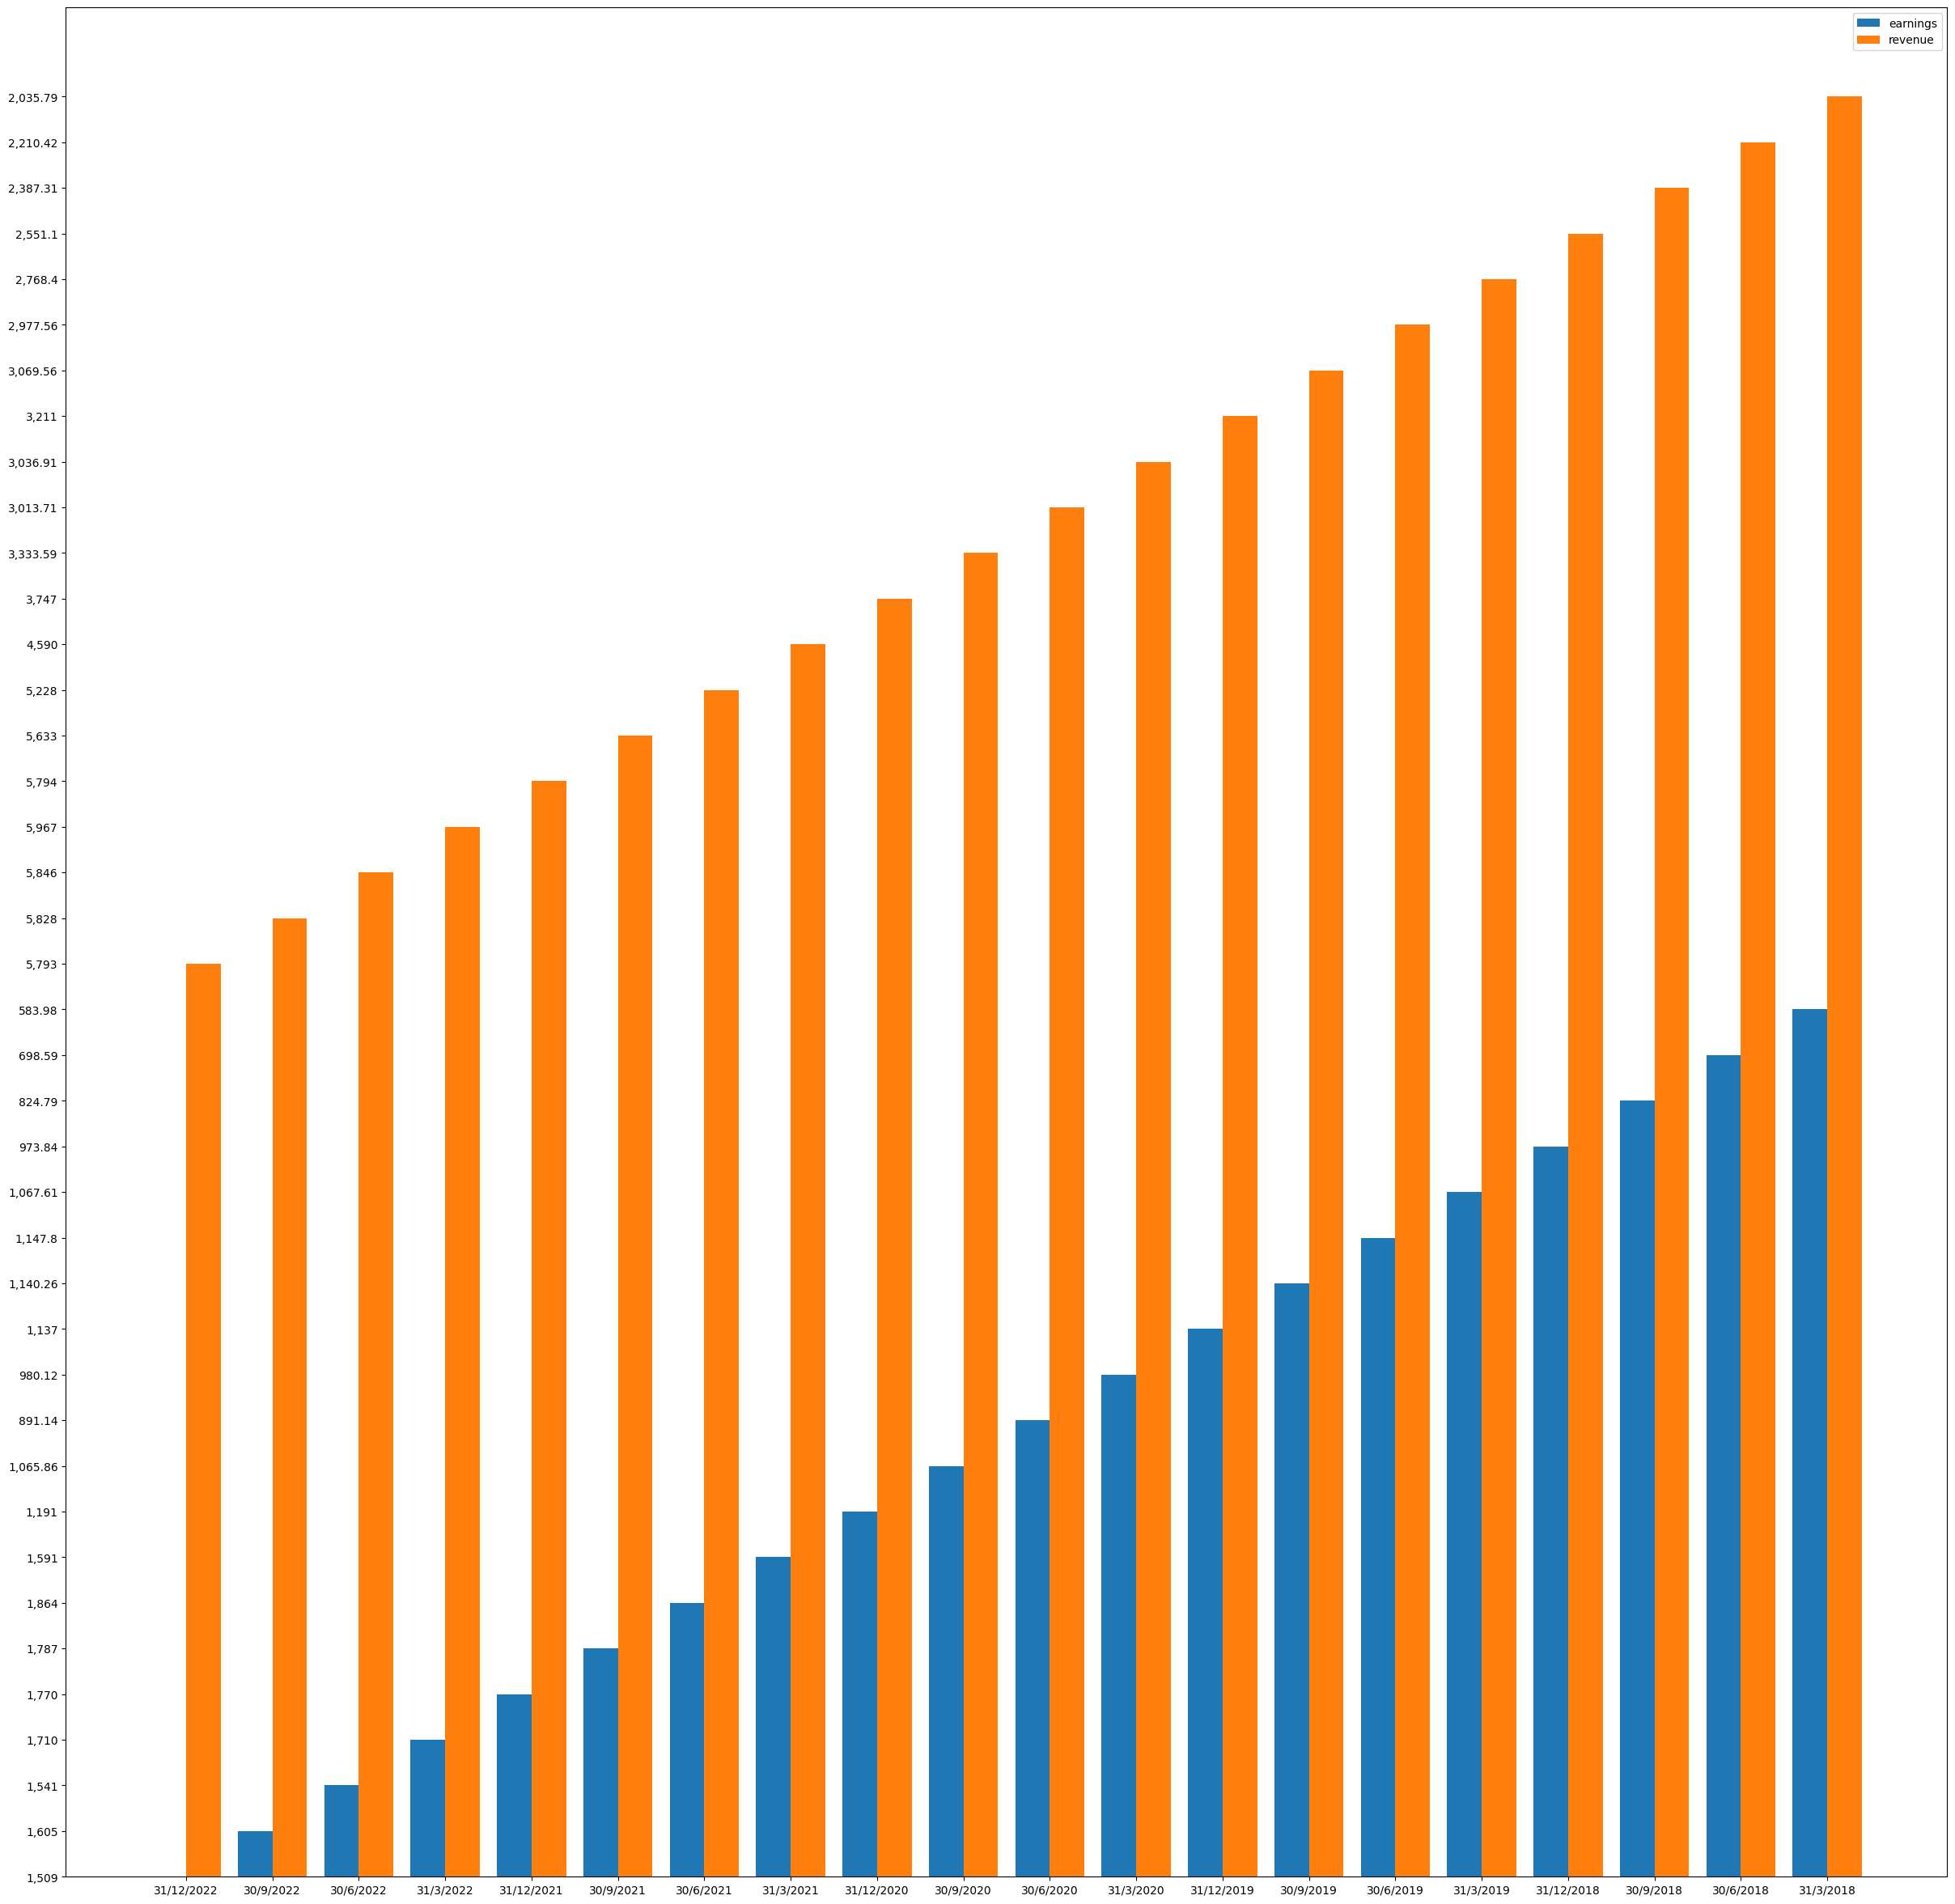

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 

earnings = df_etr["Net Income*"]
revenue = df_etr["Revenue"]
date = df_etr["Date"]

f = plt.figure()
f.set_figwidth(30)
f.set_figheight(30)
x_axis = np.arange(len(date))
plt.bar(x_axis - 0.2, earnings, width=0.4, label = 'earnings')
plt.bar(x_axis + 0.2, revenue, width=0.4, label = 'revenue')
plt.xticks(x_axis, date)
plt.legend()
plt.show()

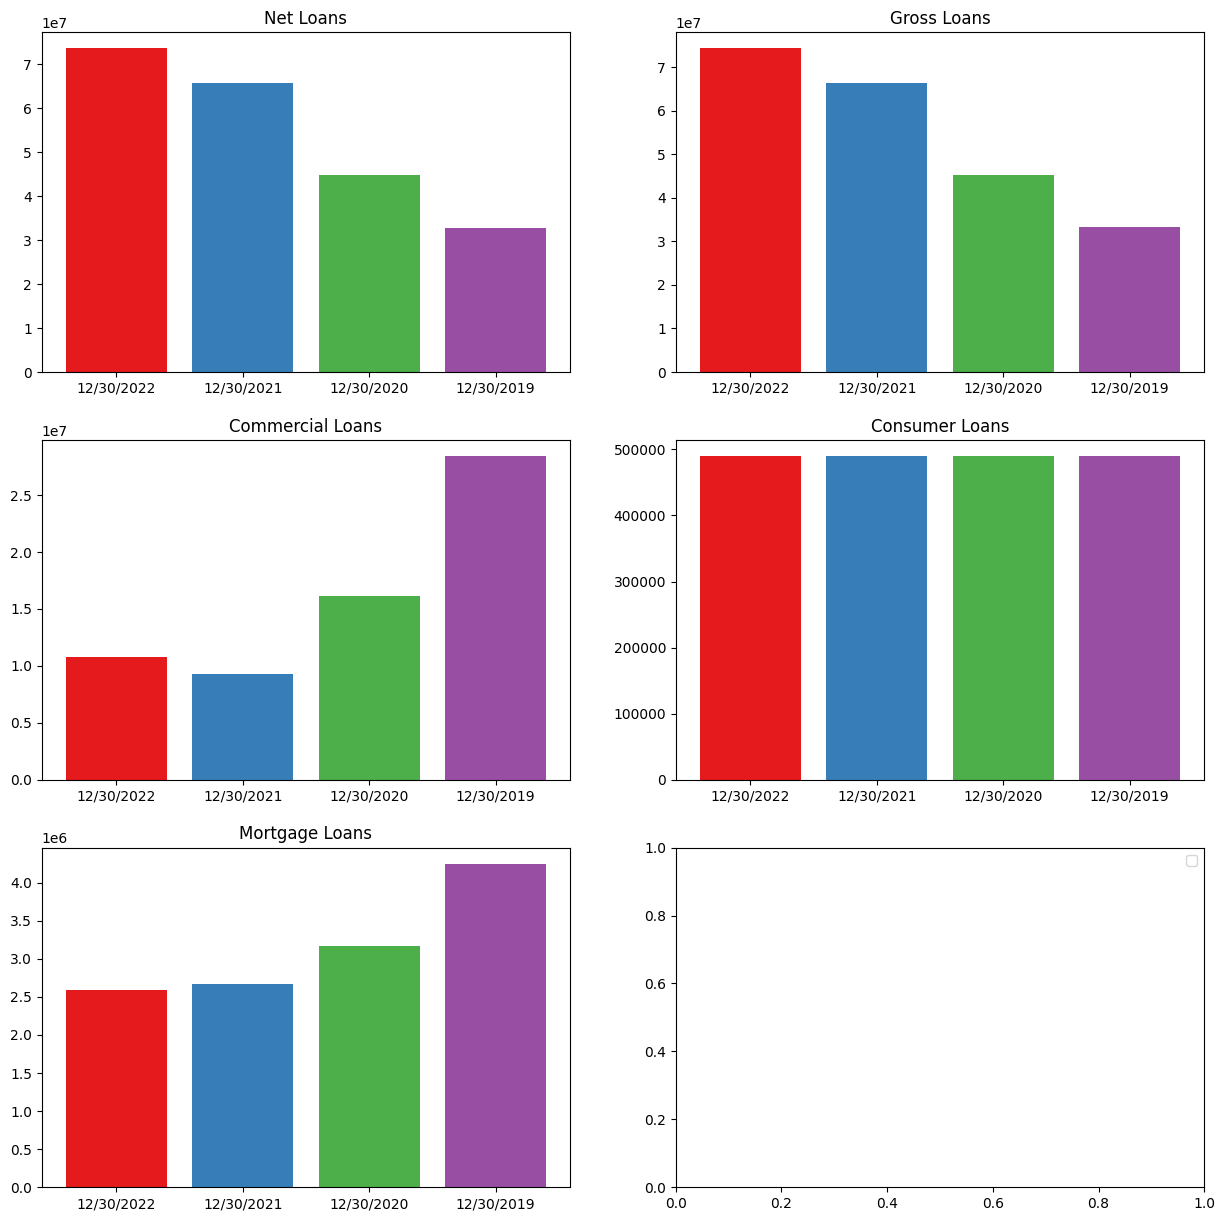

In [ ]:
loans = df_new["Net Loan"]
dates = BS_analysis["Date"]
gross_loans = df_new["Gross Loan"]
commercial_loan = df_new["Commercial Loan"]
consumer_loans = df_new["Consumer Loan"]
mortgage_loans = df_new["Mortgage Loan"]

colors = sns.color_palette('Set1')

figure, axis = plt.subplots(3, 2)
#f = plt.figure()
figure.set_figwidth(15)
figure.set_figheight(15)

axis[0, 0].bar(dates, loans,label = 'loans',color=colors[:5])
axis[0, 0].set_title("Net Loans")

axis[0,1].bar(dates, gross_loans,label = 'Gross_Loans',color=colors[:5])
axis[0, 1].set_title("Gross Loans")

axis[1,0].bar(dates, commercial_loan,label = 'Commercial Loans',color=colors[:5])
axis[1, 0].set_title("Commercial Loans")

axis[1, 1].bar(dates, consumer_loans,label = 'Consumer Loans',color=colors[:5])
axis[1, 1].set_title("Consumer Loans")

axis[2, 0].bar(dates, mortgage_loans,label = 'Mortgage Loans',color=colors[:5])
axis[2, 0].set_title("Mortgage Loans")

plt.legend()
plt.show()